In [2]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
import scipy
import numpy as np
import random

In [3]:
df = pd.read_csv('../../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.

In [5]:
scaler = StandardScaler()
df['temp_ann_standard'] = scaler.fit_transform(df[['temp_ann']])

Mean:  -0.0
SD:  1.0
95% CI:  (-0.027690496964445456, 0.02769049696444386)


<function matplotlib.pyplot.show(close=None, block=None)>

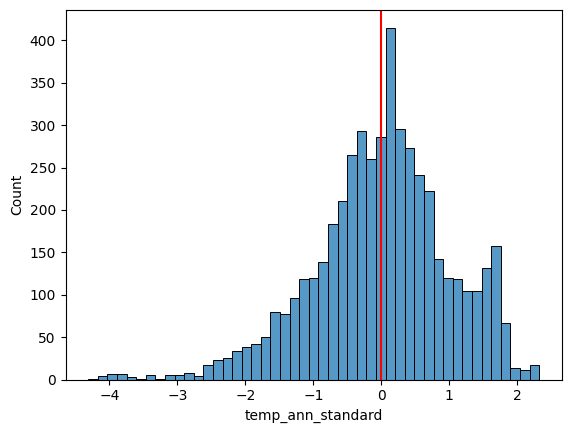

In [6]:
mean_tas = df['temp_ann_standard'].mean()
sd_tas = df['temp_ann_standard'].std()

print("Mean: ", round(mean_tas, 3))
print("SD: ", round(sd_tas, 3))

# Standard error of mean (SEM)
sem = sd_tas / np.sqrt(len(df))

conf_int = scipy.stats.norm.interval(0.95, loc=mean_tas, scale=sem)
print("95% CI: ", conf_int)

sns.histplot(df['temp_ann_standard'])
plt.axvline(x=mean_tas,color='red')
plt.show

### 2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test using both standardized and non-standardized values. Please state which is/are the null hypothesis of your test(s).

In [7]:
df_trout_true = df.loc[df['Salmo trutta fario'] == 1]
df_trout_false = df.loc[df['Salmo trutta fario'] == 0]

df_tt_no_null = df_trout_true.dropna(subset=['temp_ann'])
df_tf_no_null = df_trout_false.dropna(subset=['temp_ann'])

**H0: The data sets have equal/similar means**

In [8]:
# Non-standardized
t_statistic, p_value = scipy.stats.ttest_ind(df_tt_no_null['temp_ann'], df_tf_no_null['temp_ann'])
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis, means are significantly different")
else:
    print("Fail to reject null hypothesis, no significant difference in means")

0.0
Reject null hypothesis, means are significantly different


In [9]:
# Standardized
t_statistic, p_value = scipy.stats.ttest_ind(df_tt_no_null['temp_ann_standard'], df_tf_no_null['temp_ann_standard'])
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis, means are significantly different")
else:
    print("Fail to reject null hypothesis, no significant difference in means")

0.0
Reject null hypothesis, means are significantly different


**H0: The data sets have equal/similar mediums**

In [10]:
# Non-standardized
u_statistics, p_value = scipy.stats.mannwhitneyu(df_tt_no_null['temp_ann'], df_tf_no_null['temp_ann'])
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis, medians are significantly different")
else:
    print("Fail to reject null hypothesis, no significant difference in medians")

7.105075261935899e-303
Reject null hypothesis, medians are significantly different


In [11]:
# Standardized
u_statistics, p_value = scipy.stats.mannwhitneyu(df_tt_no_null['temp_ann_standard'], df_tf_no_null['temp_ann_standard'])
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis, medians are significantly different")
else:
    print("Fail to reject null hypothesis, no significant difference in medians")

7.105075261935899e-303
Reject null hypothesis, medians are significantly different


### 3. Test whether there are differences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

In [12]:
catch_count = df['Catchment_name'].value_counts()
top_catches = catch_count.index[:8]
print(top_catches)
df_topcatch = df[df['Catchment_name'].isin(top_catches)]

Index(['Ebro', 'Galiza-Norte', 'Minho', 'Tejo', 'Cantabrica', 'Douro',
       'Guadia', 'Catala'],
      dtype='object', name='Catchment_name')


In [18]:
df_topcatch_nonull = df_topcatch.dropna(subset=['Elevation_mean_catch'])

**H0: The means of the elevations in each catchment are equal**

In [23]:
catch_groups = [(name, group['Elevation_mean_catch']) for name, group in df_topcatch_nonull.groupby('Catchment_name')]
catch_elevation_only = [group for _, group in catch_groups]
stat, p_value = scipy.stats.f_oneway(*catch_elevation_only)

print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis, means are significantly different")
else:
    print("Fail to reject null hypothesis, no significant difference in means")

1.369526482034513e-285
Reject null hypothesis, means are significantly different


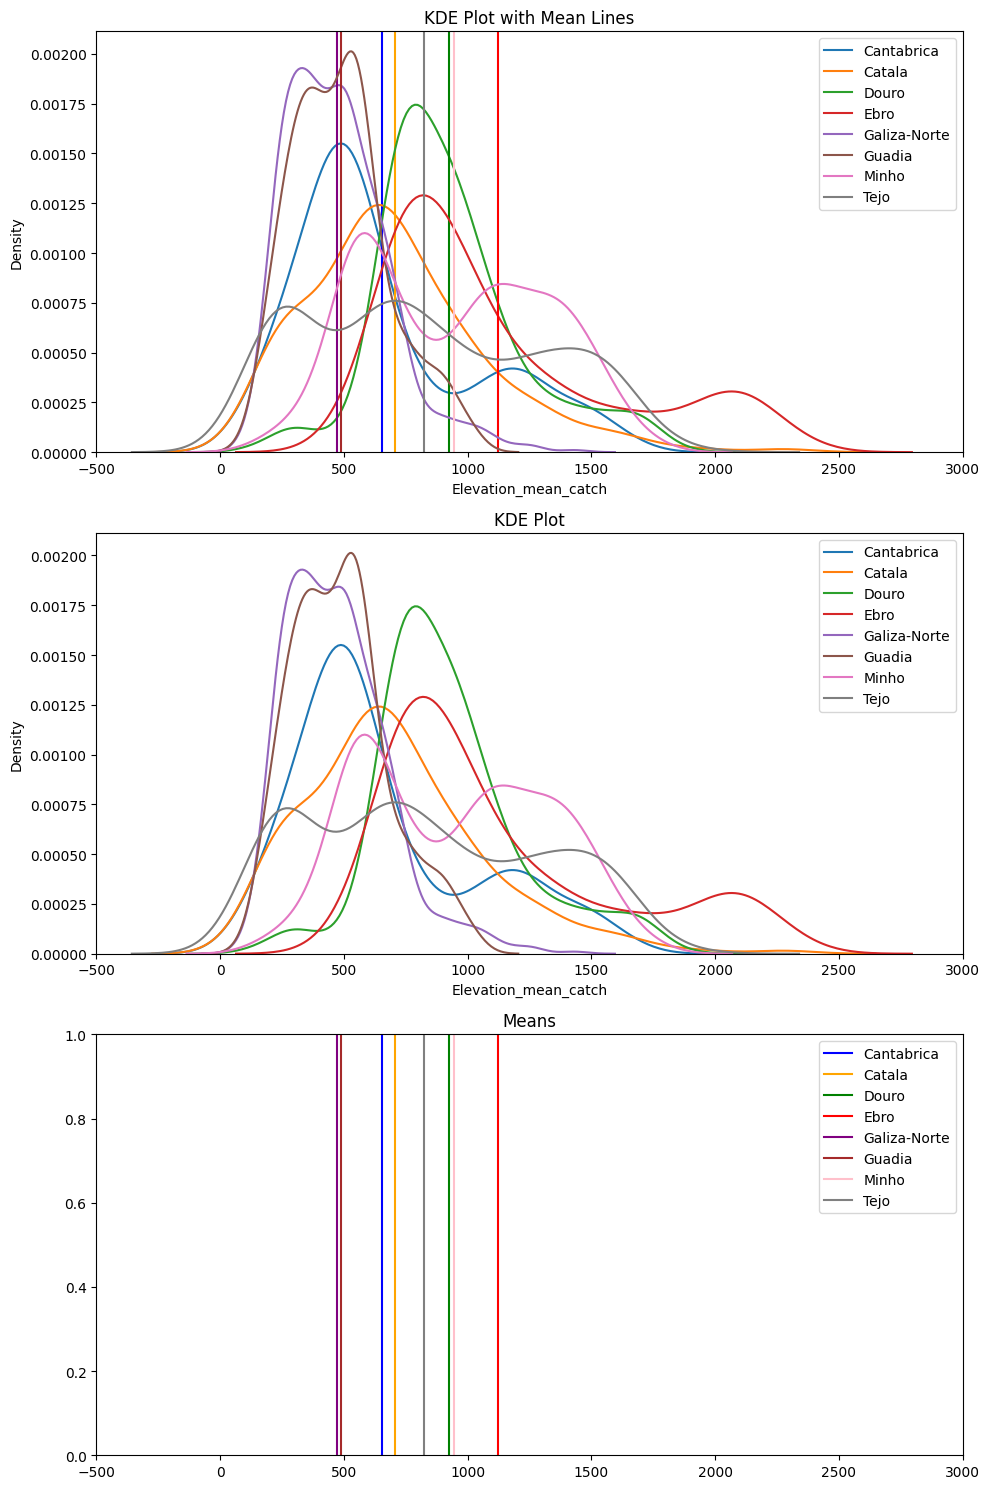

In [32]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey']

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# KDE plot with axvline
for (name, catch), color in zip(catch_groups, colors):
    sns.kdeplot(catch, label=name, ax=axes[0])
    mean_catch = catch.mean()
    axes[0].axvline(x=mean_catch, color=color)

axes[0].legend(loc="upper right")
axes[0].set_title("KDE Plot with Mean Lines")
axes[0].set_xlim(-500, 3000)

# KDE plot only
for (name, catch) in catch_groups:
    sns.kdeplot(catch, label=name, ax=axes[1])

axes[1].legend(loc="upper right")
axes[1].set_title("KDE Plot")
axes[1].set_xlim(-500, 3000)

# Plotting axvline only
for (name, catch), color in zip(catch_groups, colors):
    mean_catch = catch.mean()
    axes[2].axvline(x=mean_catch, color=color, label=name)

axes[2].legend(loc="upper right")
axes[2].set_title("Means")
axes[2].set_xlim(-500, 3000)

plt.tight_layout()
plt.show()

So the significant mean differences are primarily between both Galiza-Norte/Guadia on the lower end and Ebro on the higher end

### 4. Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

1. I did have to remove null values to perform calculations for both temperature and elevation, so there are sites where those measurements were not recorded which could have influenced the final results
2. The KDE plots show that the elevations in each catchment are not Normal Distributions, so comparing results based only on the total elevation mean of all records in the catchments might not accurately represent the actual conditions of specific areas of the catchment